# Stream order

Here we assume that flow directions are known. We read the flow direction raster data, including meta-data, using [rasterio](https://rasterio.readthedocs.io/en/latest/) and parse it to a pyflwdir `FlwDirRaster` object, see earlier examples for more background.

In [1]:
# import pyflwdir, some dependencies and convenience methods
import geopandas as gpd
import numpy as np
import rasterio
import pyflwdir

# local convenience methods (see utils.py script in notebooks folder)
from utils import quickplot, colors, cm  # data specific quick plot method

# read and parse data
with rasterio.open("rhine_d8.tif", "r") as src:
    flwdir = src.read(1)
    crs = src.crs
    flw = pyflwdir.from_array(
        flwdir,
        ftype="d8",
        transform=src.transform,
        latlon=crs.is_geographic,
        cache=True,
    )

## Strahler stream order

In the **strahler** "top down" stream order map, rivers of the first order are
the most upstream tributaries or head water cells. If two streams of the same
order merge, the resulting stream has an order of one higher.
If two rivers with different stream orders merge, the resulting stream is
given the maximum of the two order.

In [2]:
# first define streams based on an upstream area threshold, here 100 km2
stream_mask = flw.upstream_area("km2") > 100

In [3]:
# calculate the stream orders for these streams
strahler = flw.stream_order(type="strahler", mask=stream_mask)

In [4]:
# vectorize stream order for plotting
feats = flw.streams(stream_mask, strord=strahler)
gdf = gpd.GeoDataFrame.from_features(feats, crs=crs)

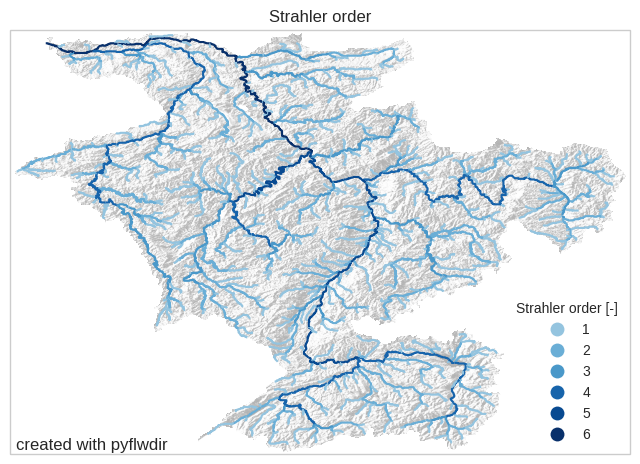

In [5]:
# properties passed to the GeoDataFrame.plot method
gpd_plot_kwds = dict(
    column="strord",
    cmap=colors.ListedColormap(cm.Blues(np.linspace(0.4, 1, 7))),
    legend=True,
    categorical=True,
    legend_kwds=dict(loc="lower right", title="Strahler order [-]"),
)
# plot streams with hillshade from elevation data (see utils.py)
ax = quickplot(
    gdfs=[(gdf, gpd_plot_kwds)], title="Strahler order", filename="flw_strord_strahler"
)

## Classic stream order

In the **classic** "bottum up" stream order map, the main river stem has order 1.
Each tributary is given a number one greater than that of the
river or stream into which they discharge.

In [6]:
strord = flw.stream_order(type="classic", mask=stream_mask)

In [7]:
# vectorize stream order for plotting purposes
feats1 = flw.streams(stream_mask, strord=strord)
gdf1 = gpd.GeoDataFrame.from_features(feats1, crs=crs)

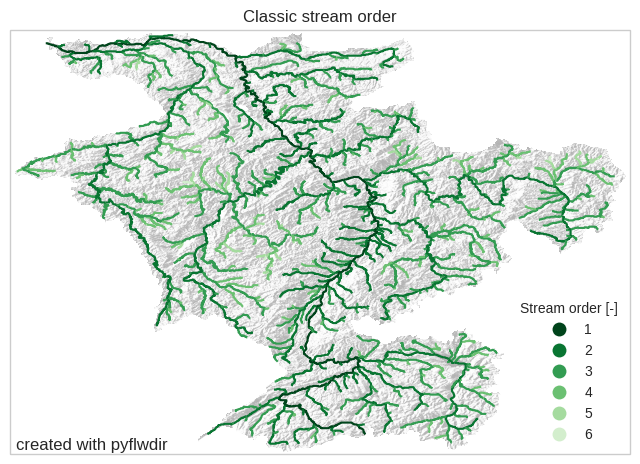

In [8]:
# properties passed to the GeoDataFrame.plot method
gpd_plot_kwds = dict(
    column="strord",
    cmap=colors.ListedColormap(cm.Greens_r(np.linspace(0, 0.8, 6))),
    legend=True,
    categorical=True,
    legend_kwds=dict(loc="lower right", title="Stream order [-]"),
)
# plot streams with hillshade from elevation data (see utils.py)
ax = quickplot(
    gdfs=[(gdf1, gpd_plot_kwds)],
    title="Classic stream order",
    filename="flw_strord_classic",
)